In [1]:
from scipy.stats import sem
from scipy.stats import t
import numpy as np
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
attendance_data_with_rain_data = pd.read_csv("processed_data/seasons_2012-2018_attendance_data.csv")

In [3]:
attendance_data_with_rain_data

,Unnamed: 0,attendance,away_conference,away_line_scores,away_points,away_team,conference_game,home_conference,home_line_scores,home_points,...,name,state,year_constructed,zip,attendance_percentage,home_team_ranked_ind,away_team_ranked_ind,rain,max_temp,min_temp
0,0,38393.0,SEC,"[7, 3, 0, 7]",17,South Carolina,True,SEC,"[0, 10, 3, 0]",13,...,Vanderbilt Stadium,TN,1922.0,37212.0,0.951499,0,1,0.0,NaN,NaN
1,1,35491.0,NaN,"[0, 0, 0, 0]",0,Presbyterian College,False,SEC,"[10, 17, 28, 3]",58,...,Vanderbilt Stadium,TN,1922.0,37212.0,0.879579,0,0,0.0,NaN,NaN
2,2,40350.0,SEC,"[0, 11, 7, 13]",31,Florida,True,SEC,"[7, 0, 0, 10]",17,...,Vanderbilt Stadium,TN,1922.0,37212.0,1.000000,0,1,5.0,NaN,NaN
3,3,40350.0,SEC,"[0, 10, 0, 3]",13,Auburn,True,SEC,"[7, 3, 7, 0]",17,...,Vanderbilt Stadium,TN,1922.0,37212.0,1.000000,0,0,0.0,NaN,NaN
4,4,32227.0,Mid-American,"[0, 0, 0, 7]",7,UMass,False,SEC,"[7, 14, 28, 0]",49,...,Vanderbilt Stadium,TN,1922.0,37212.0,0.798686,0,0,38.0,NaN,NaN
5,5,40350.0,SEC,"[0, 10, 0, 8]",18,Tennessee,True,SEC,"[3, 10, 21, 7]",41,...,Vanderbilt Stadium,TN,1922.0,37212.0,1.000000,0,0,0.0,NaN,NaN
6,6,40350.0,SEC,"[10, 0, 15, 14]",39,Ole Miss,True,SEC,"[0, 21, 7, 7]",35,...,Vanderbilt Stadium,TN,1922.0,37212.0,1.000000,0,0,0.0,NaN,NaN
7,7,33162.0,NaN,"[0, 0, 3, 0]",3,Austin Peay,False,SEC,"[3, 35, 0, 0]",38,...,Vanderbilt Stadium,TN,1922.0,37212.0,0.821859,0,0,0.0,NaN,NaN
8,8,32467.0,Conference USA,"[3, 3, 3, 15]",24,UAB,False,SEC,"[7, 17, 7, 21]",52,...,Vanderbilt Stadium,TN,1922.0,37212.0,0.804634,0,0,0.0,NaN,NaN
9,9,36892.0,SEC,"[20, 10, 14, 7]",51,Missouri,True,SEC,"[0, 7, 14, 7]",28,...,Vanderbilt Stadium,TN,1922.0,37212.0,0.914300,0,0,0.0,NaN,NaN


----------------

# What factors influenced attendance rates at College Football games over the 2012 - 2018 seasons?  

## *H1. Larger stadium capacities have higher percentages of attendance than stadiums that accommodate less people.*

If you build it they will come!!

In [29]:
stadiums = attendance_data_with_rain_data["name"].unique()
average_attendance_percentages = []
capacities = []

for stadium in stadiums:
    stadium_rows = attendance_data_with_rain_data[attendance_data_with_rain_data["name"] == stadium]
    average_attendance_percentage = np.mean(stadium_rows["attendance_percentage"])
    capacity = np.mean(stadium_rows["capacity"])
    capacities.append(capacity)
    average_attendance_percentages.append(average_attendance_percentage) 
    
average_attendance_data = pd.DataFrame()
average_attendance_data["name"] = stadiums
average_attendance_data["capacity"] = capacities
average_attendance_data["average_attendance_percentage"] = average_attendance_percentages

In [31]:
largest_stadiums = average_attendance_data.nlargest(5, "capacity")
largest_stadiums[["name", "capacity", "average_attendance_percentage"]]

,name,capacity,average_attendance_percentage
54,Michigan Stadium,107601.0,1.023081
10,Beaver Stadium,106572.0,0.942074
55,Kyle Field,102733.0,0.943094
60,Neyland Stadium,102455.0,0.951279
30,Tiger Stadium,102321.0,0.915319


In [32]:
smallest_stadiums = average_attendance_data.nsmallest(5, "capacity")
smallest_stadiums[["name", "capacity", "average_attendance_percentage"]]

,name,capacity,average_attendance_percentage
3,Kibbie Dome,16000.0,0.762361
35,Houchens Industries-L. T. Smith Stadium,22113.0,0.759526
49,Yager Stadium,24286.0,0.659231
63,UB Stadium,29013.0,0.611911
62,War Memorial Stadium,29181.0,0.681854


------------------------
## *H2. The higher the quality of the home team for the game week, the higher the percentage of attendance.*

In [4]:
home_team_ranked = attendance_data_with_rain_data[attendance_data_with_rain_data["home_team_ranked_ind"] == 1]["attendance_percentage"]
home_team_unranked = attendance_data_with_rain_data[attendance_data_with_rain_data["home_team_ranked_ind"] == 0]["attendance_percentage"]

data = [home_team_ranked, home_team_unranked]
fig, ax = plt.subplots()
ax.set_title("Home Team")
bp = ax.boxplot(data)

## change outline color, fill color and linewidth of the boxes
for box in bp["boxes"]:
    # change outline color
    box.set(color="#8426CD", linewidth=2)

## change color and linewidth of the whiskers
for whisker in bp["whiskers"]:
    whisker.set(color="#8426CD", linewidth=2)

## change color and linewidth of the medians
for median in bp["medians"]:
    median.set(color="#D4201A", linewidth=2)

plt.show()

NameError: name 'attendance_data_with_rain_data' is not defined

--------------------
## *H3. The higher the quality of the away team for the game week, the higher the percentage of attendance.*

In [ ]:
away_team_ranked = attendance_data_with_rain_data[attendance_data_with_rain_data["away_team_ranked_ind"] == 1]["attendance_percentage"]
away_team_unranked = attendance_data_with_rain_data[attendance_data_with_rain_data["away_team_ranked_ind"] == 0]["attendance_percentage"]

data = [away_team_ranked, away_team_unranked]
fig, ax = plt.subplots()
ax.set_title("Away Team")
bp = ax.boxplot(data)

## change outline color, fill color and linewidth of the boxes
for box in bp["boxes"]:
    # change outline color
    box.set(color="#8426CD", linewidth=2)

## change color and linewidth of the whiskers
for whisker in bp["whiskers"]:
    whisker.set(color="#8426CD", linewidth=2)

## change color and linewidth of the medians
for median in bp["medians"]:
    median.set(color="#D4201A", linewidth=2)

plt.show()

---------------------
## *H4. Conference matchups have higher percentages of attendance than non-conference games.*

In [ ]:
conference_matchups = attendance_data_with_rain_data[attendance_data_with_rain_data["conference_game"]]["attendance_percentage"]
non_conference_matchups = attendance_data_with_rain_data[attendance_data_with_rain_data["conference_game"]]["attendance_percentage"]

data = [conference_matchups, non_conference_matchups]
fig, ax = plt.subplots()
ax.set_title("Conference Ind")
bp = ax.boxplot(data)

## change outline color, fill color and linewidth of the boxes
for box in bp["boxes"]:
    # change outline color
    box.set(color="#8426CD", linewidth=2)

## change color and linewidth of the whiskers
for whisker in bp["whiskers"]:
    whisker.set(color="#8426CD", linewidth=2)

## change color and linewidth of the medians
for median in bp["medians"]:
    median.set(color="#D4201A", linewidth=2)

plt.show()

--------------------------
## *H5. Games with a temperate kickoff temperature will have higher percentages of attendance than those with extremely high or extremely low temperatures.*

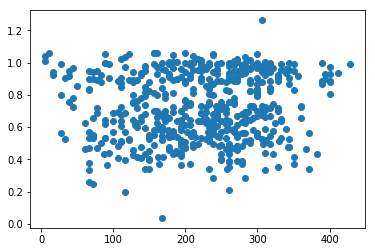

In [22]:
max_temp_attendance = attendance_data_with_rain_data[attendance_data_with_rain_data["max_temp"] >= 0]

plt.plot(max_temp_attendance["max_temp"], max_temp_attendance["attendance_percentage"], "o")
plt.show()

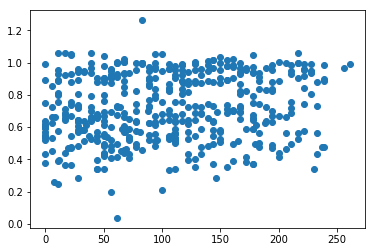

In [21]:
min_temp_attendance = attendance_data_with_rain_data[attendance_data_with_rain_data["min_temp"] >= 0]

plt.plot(min_temp_attendance["min_temp"], min_temp_attendance["attendance_percentage"], "o")
plt.show()

-----------------------
## H6. *Games without rain will have higher percentages of attendance than those with rain.*

In [8]:
attendance_data_with_rain_data = attendance_data[attendance_data["rain"] >= 0]

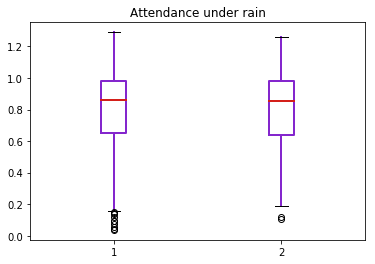

In [9]:
attendance_with_rain = attendance_data_with_rain_data[attendance_data_with_rain_data["rain"] == 0]["attendance_percentage"]
attendance_without_rain = attendance_data_with_rain_data[attendance_data_with_rain_data["rain"] > 0]["attendance_percentage"]

data = [attendance_with_rain, attendance_without_rain]
fig, ax = plt.subplots()
ax.set_title("Attendance under rain")
bp = ax.boxplot(data)

## change outline color, fill color and linewidth of the boxes
for box in bp["boxes"]:
    # change outline color
    box.set(color="#8426CD", linewidth=2)

## change color and linewidth of the whiskers
for whisker in bp["whiskers"]:
    whisker.set(color="#8426CD", linewidth=2)

## change color and linewidth of the medians
for median in bp["medians"]:
    median.set(color="#D4201A", linewidth=2)

plt.show()

In [16]:
mean_with_rain, mean_without_rain = np.mean(attendance_with_rain), np.mean(attendance_without_rain)

#std1, std2 = std(attendance_with_rain, ddof=1), std(attendance_without_rain, ddof=1)
n1, n2 = len(attendance_with_rain), len(attendance_without_rain)
#se1, se2 = std1/sqrt(n1), std2/sqrt(n2)

# calculate standard errors
se1, se2 = sem(attendance_with_rain), sem(attendance_without_rain)

# standard error on the difference between the samples
sed = sqrt(se1**2.0 + se2**2.0)

# calculate the t statistic
t_stat = (mean_with_rain - mean_without_rain) / sed

# degrees of freedom
df = n1 + n2 - 2

In [17]:
t_stat

-0.48668480110106727